In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv("D://learning//DA//Datasets//Chennaihouseingsale.csv")

In [3]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [5]:
df4 = df.dropna()

In [6]:
df4.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [7]:
for names in df4.columns:
    if df4[names].dtype == 'object':
        print()
        print(names)
        print(df4[names].unique())


PRT_ID
['P03210' 'P09411' 'P01812' ... 'P09594' 'P06508' 'P09794']

AREA
['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']

DATE_SALE
['04-05-2011' '19-12-2006' '04-02-2012' ... '28-03-2014' '25-08-2006'
 '13-07-2005']

SALE_COND
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']

PARK_FACIL
['Yes' 'No' 'Noo']

DATE_BUILD
['15-05-1967' '22-12-1995' '09-02-1992' ... '01-09-1978' '11-08-1977'
 '24-07-1961']

BUILDTYPE
['Commercial' 'Others' 'Other' 'House' 'Comercial']

UTILITY_AVAIL
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']

STREET
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']

MZZONE
['A' 'RH' 'RL' 'I' 'C' 'RM']


In [186]:
#Replacing typos/abbreviations in AREA, STREET, BUILDTYPE, UTILITY, SALE_COND, PARK_FAC column with correct values

df4["AREA"] = df4["AREA"].replace({"Karapakam": "Karapakkam", "Adyr": "Adyar","Chrmpet":"Chrompet","Chormpet":"Chrompet",
                                 "Chrompt":"Chrompet", "Ana Nagar":"Anna Nagar", "Ann Nagar":"Anna Nagar","KKNagar":"KK Nagar",
                                "TNagar":"T Nagar", "Velchery":"Velachery"})
df4["STREET"] = df4["STREET"].replace({"Pavd": "Paved", "Pavd": "No Access"})
df4["BUILDTYPE"] = df4["BUILDTYPE"].replace({"Other": "Others", "Comercial": "Commercial"})
df4["UTILITY_AVAIL"] = df4["UTILITY_AVAIL"].replace({"AllPub": "All Pub", "NoSewr": "NoSeWa"})
df4["SALE_COND"] = df4["SALE_COND"].replace({"AbNormal": "Ab Normal", "PartiaLl":"Partial","Partiall": "Partial"})
#Converting categorical PARK_FACIL to numeric values
df4["PARK_FACIL"] = df4["PARK_FACIL"].replace({"Noo": 0,"No":0,"Yes":1})

C:\Users\tsche\AppData\Local\Temp\ipykernel_31632\1483815439.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tsche\AppData\Local\Temp\ipykernel_31632\1483815439.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tsche\AppData\Local\Temp\ipykernel_31632\1483815439.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [187]:
df5 = df4.drop(columns=["QS_ROOMS","QS_BATHROOM","QS_BEDROOM"] )

In [188]:
#Creating new Total_Sales_Price column by summing relevant columns
df5["Total_Sales_Price"]=df5["REG_FEE"]+df5["COMMIS"]+df5["SALES_PRICE"]

In [11]:
df6 = df5.drop(columns=["REG_FEE","COMMIS","SALES_PRICE"] )

In [13]:
#Converting DATE_SALE and DATE_BUILD columns to datetime format
df6['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'], format='%d-%m-%Y')

df6['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'], format='%d-%m-%Y')


In [60]:
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key , subdf in df6.groupby('AREA'):
        m = np.mean(subdf.Total_Sales_Price)
        std = np.std(subdf.Total_Sales_Price)
        reduced_df= subdf[(subdf.Total_Sales_Price >(m-std)) & (subdf.Total_Sales_Price <(m+std))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [161]:
df6_1=df6[~(df6.INT_SQFT/df6.N_ROOM<300)]

In [162]:
df6_2 = remove_pps_outlier(df6_1)

In [163]:
df6_2["DATE_BUILD"].nlargest(5)

1473   2010-11-12
1619   2010-11-03
2146   2010-10-12
1765   2010-09-21
1981   2010-07-15
Name: DATE_BUILD, dtype: datetime64[ns]

In [164]:
#Export cleaned dataframe to new CSV file
df6_2.to_csv('ChennaiHousingPrice.csv', index=False)


In [165]:
#Plot histogram of Total_Sales_Price
fig = px.histogram(df6_2, x='Total_Sales_Price', nbins=20)
fig.show()

C:\Users\tsche\AppData\Local\Temp\ipykernel_31632\2829361788.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



                   INT_SQFT  DIST_MAINROAD  N_BEDROOM  N_BATHROOM    N_ROOM  \
INT_SQFT           1.000000       0.003327   0.791871    0.525634  0.950486   
DIST_MAINROAD      0.003327       1.000000   0.008700    0.014381  0.003690   
N_BEDROOM          0.791871       0.008700   1.000000    0.762888  0.846111   
N_BATHROOM         0.525634       0.014381   0.762888    1.000000  0.583971   
N_ROOM             0.950486       0.003690   0.846111    0.583971  1.000000   
PARK_FACIL        -0.041731      -0.008207  -0.047817   -0.059265 -0.050093   
QS_OVERALL         0.014879      -0.037413   0.022882    0.007804  0.019581   
Total_Sales_Price  0.616636       0.014590   0.295540    0.013882  0.586695   

                   PARK_FACIL  QS_OVERALL  Total_Sales_Price  
INT_SQFT            -0.041731    0.014879           0.616636  
DIST_MAINROAD       -0.008207   -0.037413           0.014590  
N_BEDROOM           -0.047817    0.022882           0.295540  
N_BATHROOM          -0.059265    0.0

<Axes: >

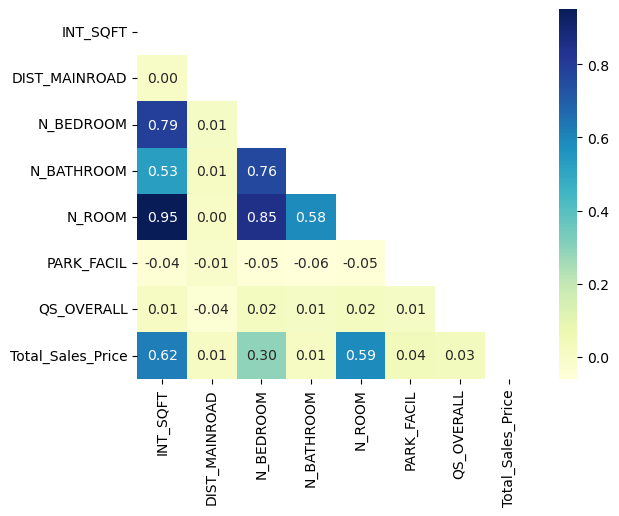

In [189]:
#Print correlation matrix
corr_matrix = df6_2.corr()
print(corr_matrix)
#Generate heatmap visualization of correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlGnBu", mask=mask)

In [167]:
#Drop non-useful columns
df7 = df6_2.drop(["PRT_ID","DATE_SALE","SALE_COND","DATE_BUILD","BUILDTYPE","UTILITY_AVAIL","STREET","MZZONE"]
              , axis="columns")
df7.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,QS_OVERALL,Total_Sales_Price
0,Adyar,1056,83,1.0,1.0,3,1,3.19,9743177
1,Adyar,1136,69,1.0,1.0,3,1,3.35,8660489
2,Adyar,730,185,1.0,1.0,2,1,4.18,9166824
3,Adyar,868,15,1.0,1.0,3,0,2.11,9439900
4,Adyar,904,52,1.0,1.0,3,0,3.08,11972645


In [168]:
#One-hot encode AREA column
dummy = pd.get_dummies(df7.AREA)
dummy.head()

,Adyar,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [169]:
df8=pd.concat([df7,dummy.drop('Adyar', axis='columns')], axis='columns')

In [170]:
#Drop original AREA column
df9 = df8.drop(columns='AREA')

In [171]:
X = df9.drop(['Total_Sales_Price','DIST_MAINROAD','N_BEDROOM','QS_OVERALL','N_BATHROOM','PARK_FACIL'], axis='columns')
y=df9["Total_Sales_Price"]
X.head()

,INT_SQFT,N_ROOM,Anna Nagar,Chrompet,KK Nagar,Karapakkam,T Nagar,Velachery
0,1056,3,0,0,0,0,0,0
1,1136,3,0,0,0,0,0,0
2,730,2,0,0,0,0,0,0
3,868,3,0,0,0,0,0,0
4,904,3,0,0,0,0,0,0


In [172]:
#Split data into train/test sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.6, random_state=10)

In [173]:
#fit linear regression model, calculate score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7304897028952231

In [174]:
#Use cross-validation to evaluate model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score


cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state = 0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.74987644, 0.7286323 , 0.74969081, 0.72201518, 0.72457148])

In [152]:
#Grid search different models and parameters using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'n_jobs':[1, 2, 4]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []

    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
            })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\tsche\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tsche\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tsche\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\tsche\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\tsche\anaconda3\lib\site-packages\sklearn\base.py", line

,model,best_score,best_params
0,linear_regression,0.734957,"{'fit_intercept': True, 'n_jobs': 1}"
1,lasso,0.734958,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.524158,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [178]:
#Function to predict house price based on inputs
def predict_price(AREA,INT_SQFT,N_ROOM):
    loc_index = np.where(X.columns== AREA)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0] = INT_SQFT
    x[1] = N_ROOM
    if loc_index >=0:
        x[loc_index] = 1
        
    return lr.predict([x])[0]

In [193]:
round(predict_price('T Nagar',1200, 3),2)

C:\Users\tsche\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



14445947.08

<img width="400" src="https://static.toiimg.com/thumb/msid-88299694,imgsize-53534,width-400,resizemode-4/88299694.jpg" />